<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Тестирование модели</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_curve, roc_auc_score
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings("ignore")

In [5]:
try:
    data = pd.read_csv('/datasets/Churn.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/Churn.csv') 

Просмотр информации о таблице 

In [6]:
display(data.info())
display(data.describe())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


None

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64


* RowNumber — индекс строки в данных
* CustomerId — уникальный идентификатор клиента
* Surname — фамилия
* CreditScore — кредитный рейтинг
* Geography — страна проживания
* Gender — пол
* Age — возраст
* Tenure — сколько лет человек является клиентом банка
* Balance — баланс на счёте
* NumOfProducts — количество продуктов банка, используемых клиентом
* HasCrCard — наличие кредитной карты
* IsActiveMember — активность клиента
* EstimatedSalary — предполагаемая зарплата

столб Tenure изменить тип данных. Кроме того, не могу заменить пропуски на среднее значение, потому что возникнет проблема переобучения.

Есть столбы, которые нам не очень нужны для анализа, удалю их

In [7]:
data = data.drop(['RowNumber','CustomerId','Surname'], axis=1)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


заменю пустые значения и тип данных

In [8]:
data['Tenure'] = data['Tenure'].replace(np.NaN, None).astype(int,errors='ignore').astype(object)
imputer = SimpleImputer(strategy='constant')
imp_data = pd.DataFrame(imputer.fit_transform(data))
imp_data.columns = data.columns
data['Tenure'].isnull().sum()

0

кодирование с помощью OHE

In [9]:
data = pd.get_dummies(data, drop_first=True)
scaler = StandardScaler()
numeric = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
scaler.fit(data[numeric])
data[numeric] = scaler.transform(data[numeric])

поделим выборку на тестовые и валидационные данные 

In [10]:
X = data.drop(['Exited'], axis=1)
y = data['Exited']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.6, test_size=0.4, random_state=12345)
X_test, X_valid, y_test, y_valid = train_test_split(X_valid, y_valid, test_size=0.5, random_state=12345)

print(X_train.shape[0])
print(X_valid.shape[0])
print(X_test.shape[0])

6000
2000
2000


Итог:
* в столбе Tenure изменен тип данных;
* заменила пропуски; 
* изменила тип данных;
* разделила данные на тестовую и валидационную выборку 


## Исследование задачи

посмотрим баланс классов 

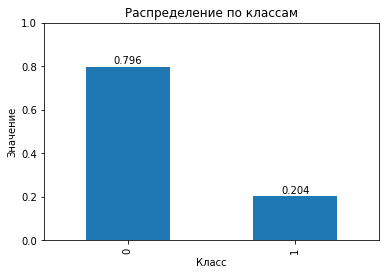

In [11]:
class_frequency = data['Exited'].value_counts(normalize=True)
plot = class_frequency.plot(kind='bar')
for rect in plot.patches:
    height = rect.get_height()
    plot.text(rect.get_x() + rect.get_width()/2, 1.01*height, round(height, 3), ha='center', va='bottom')
plt.title('Распределение по классам')
plt.xlabel('Класс')
plt.ylabel('Значение')
plt.ylim(0, 1)
plt.show()

Классы несбалансированы:  почти 80% отрицательных и 20% положительных.

Посмотрю, что лучше для обучение логическая регрессия или модель леса

In [12]:
rfc = RandomForestClassifier(random_state=12345)
param_grid = { 
    'n_estimators': [10, 20, 30, 40, 50],
    'max_features': ['log2'],
    'max_depth' : [5,7,9,11,13,15],
    'criterion' : ['gini']
}

In [13]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=12345),
             param_grid={'criterion': ['gini'],
                         'max_depth': [5, 7, 9, 11, 13, 15],
                         'max_features': ['log2'],
                         'n_estimators': [10, 20, 30, 40, 50]})

In [14]:
predicted_valid = CV_rfc.predict(X_valid)
accuracy_valid = accuracy_score(predicted_valid, y_valid)
print('Accuracy:', accuracy_valid)
print('f1:', f1_score(y_valid, predicted_valid))

Accuracy: 0.841
f1: 0.4903846153846155


In [15]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(X_train, y_train)
predicted_valid = model.predict(X_valid)
accuracy_valid = accuracy_score(predicted_valid, y_valid)
print('Accuracy:',accuracy_valid)
print('f1:', f1_score(y_valid, predicted_valid))

Accuracy: 0.789
f1: 0.2673611111111111


Модель леса явно выигрывает по точности 

# Борьба с дисбалансом

добавим в модель случайного леса class_weight='balanced'

In [16]:
for depth in range(1, 50, 2):
    model = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=50, class_weight='balanced')
    model.fit(X_train, y_train)
    predictions = model.predict(X_valid)
    print("depth = ", depth, accuracy_score(predictions, y_valid))
    print('\n')
    print('f1', f1_score(y_valid, predictions))

depth =  1 0.737


f1 0.4932562620423892
depth =  3 0.775


f1 0.5689655172413792
depth =  5 0.7865


f1 0.5784797630799605
depth =  7 0.7995


f1 0.5835929387331257
depth =  9 0.8215


f1 0.6011173184357542
depth =  11 0.8375


f1 0.6002460024600247
depth =  13 0.842


f1 0.5809018567639258
depth =  15 0.847


f1 0.5665722379603401
depth =  17 0.843


f1 0.5355029585798817
depth =  19 0.843


f1 0.5184049079754601
depth =  21 0.8395


f1 0.4944881889763779
depth =  23 0.8415


f1 0.5023547880690737
depth =  25 0.8405


f1 0.49763779527559054
depth =  27 0.838


f1 0.4840764331210191
depth =  29 0.839


f1 0.4888888888888888
depth =  31 0.839


f1 0.4888888888888888
depth =  33 0.839


f1 0.4888888888888888
depth =  35 0.839


f1 0.4888888888888888
depth =  37 0.839


f1 0.4888888888888888
depth =  39 0.839


f1 0.4888888888888888
depth =  41 0.839


f1 0.4888888888888888
depth =  43 0.839


f1 0.4888888888888888
depth =  45 0.839


f1 0.4888888888888888
depth =  47 0.839


f1 0.488888

depth =  17 Accuracy: 0.8435 лучший результат

теперь попробую увеличить выборку и посмотреть 

In [17]:
def upsample(features, target, repeat):
    X_zeros = X_train[y_train == 0]
    X_ones = X_train[y_train == 1]
    y_zeros = y_train[y_train == 0]
    y_ones = y_train[y_train == 1]

    X_upsampled = pd.concat([X_zeros] + [X_ones] * repeat)
    y_upsampled = pd.concat([y_zeros] + [y_ones] * repeat)
    
    X_upsampled, y_upsampled = shuffle(X_upsampled, y_upsampled, random_state=12345)
    return X_upsampled, y_upsampled

In [18]:
X_upsampled, y_upsampled = upsample(X_train, y_train, 5)

In [19]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
CV_rfc.fit(X_upsampled, y_upsampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=12345),
             param_grid={'criterion': ['gini'],
                         'max_depth': [5, 7, 9, 11, 13, 15],
                         'max_features': ['log2'],
                         'n_estimators': [10, 20, 30, 40, 50]})

In [20]:
predictions = CV_rfc.best_estimator_.predict(X_valid)
print("Accuracy:", accuracy_score(predictions, y_valid))
print("F1:", f1_score(predictions, y_valid))

Accuracy: 0.833
F1: 0.5946601941747574


 результат 0.582210242587601 наилучший 

In [21]:
def downsample(X, y, fraction):
    X_zeros = X[y == 0]
    X_ones = X[y == 1]
    y_zeros = y[y == 0]
    y_ones = y[y == 1]

    X_downsampled = pd.concat([X_zeros.sample(frac=fraction, random_state=12345)] + [X_ones])
    y_downsampled = pd.concat([y_zeros.sample(frac=fraction, random_state=12345)] + [y_ones])
    
    X_downsampled, y_downsampled = shuffle(X_downsampled, y_downsampled, random_state=12345)
    
    return X_downsampled, y_downsampled

In [22]:
X_downsampled, y_downsampled = downsample(X_train, y_train, 0.26)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
CV_rfc.fit(X_downsampled, y_downsampled)   
predictions = CV_rfc.best_estimator_.predict(X_valid)
print("Accuracy:", accuracy_score(predictions, y_valid))
print("F1:", f1_score(predictions, y_valid))   

Accuracy: 0.7855
F1: 0.5918173168411037


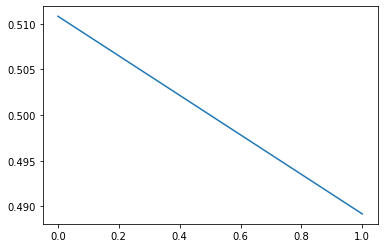

In [23]:
y_downsampled.value_counts(normalize=True).plot()

In [24]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
CV_rfc.fit(X_downsampled, y_downsampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=12345),
             param_grid={'criterion': ['gini'],
                         'max_depth': [5, 7, 9, 11, 13, 15],
                         'max_features': ['log2'],
                         'n_estimators': [10, 20, 30, 40, 50]})

In [25]:
predictions = CV_rfc.best_estimator_.predict(X_valid)
print("Accuracy:", accuracy_score(predictions, y_valid))
print("F1:", f1_score(predictions, y_valid))

Accuracy: 0.7855
F1: 0.5918173168411037


 результат 0.5938069216757742 наилучший

## Тестирование модели

In [26]:
predictions = CV_rfc.best_estimator_.predict(X_test)
print("Accuracy:", accuracy_score(predictions, y_test))
print("F1:", f1_score(predictions, y_test))

Accuracy: 0.7865
F1: 0.5906040268456376


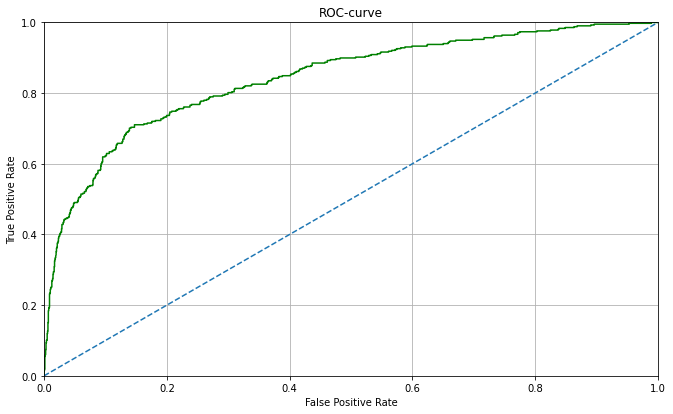

In [27]:
y_pred = CV_rfc.best_estimator_.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(11, 6.5))
plt.plot(fpr, tpr, color='green',label='ROC кривая (area = %0.2f)')
plt.grid(True)
plt.title('ROC-curve')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.xlim(0, 1)
plt.ylim(0, 1)

plt.show()

Вывод:
* Cделана предработка данных
* Разделены данные на выборки 
* Я использовала LogisticRegression и RandomForestClassifier, где получилось, что LogisticRegression показывает наименьшие результаты. 
* Далее я увеличивала и уменьшала выборку уже в RandomForestClassifier, где результат 0.5938069216757742 наилучший
* тестирование модели показало результат accuracy = 0.854 и f1_score 0.61

